## Examen 3

1) Determine el espacio de configuraciones, en los ejes $(x,\omega)$, del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$.




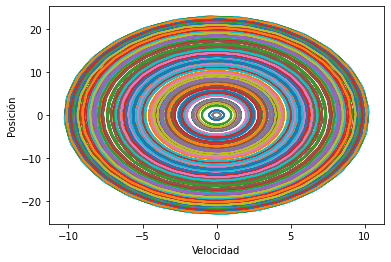

In [55]:
import scipy.integrate as sci
import numpy as np 
import matplotlib.pyplot as plt


m= 0.2
k= 1

def fun(U,w):
  x,dx=U
  return [dx,(-k/m)*x]  

U_0= [0.5,0]
t=np.linspace(0,10,1000)
sol= sci.odeint(fun,U_0,t)

#plt.plot(t,sol)
plt.plot(sol[:,0],sol[:,1])

for i in range(200):
  x1= np.random.uniform(-10,10)
  y1= np.random.uniform(-10,10)
  U_1= [x1,y1]
  sol1= sci.odeint(fun,U_1,t1)
  plt.plot(sol1[:,0],sol1[:,1])
  plt.ylabel("Posición")
  plt.xlabel("Velocidad")







2) Considere una muestra de Strontium-90, ${}^{90}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

El tiempo de vida media es: 27.64359222923699, su error es: 0.7576112761883531


array([12.30733693,  0.75761128,  6.1312503 ])

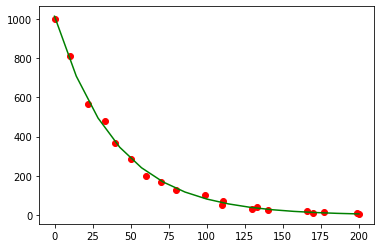

In [166]:
import pandas as pd
import scipy.optimize
import scipy as sp

url = 'https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json'
df= pd.read_json(url)

df
plt.plot(df["t"],df['N(t)'],"ro")


x= sp.optimize.curve_fit(lambda t,a,h,b: a*2**(-t/h) +b,  df['t'], df['N(t)'])
x_0=x[0]
pcov= x[1]
def fun(t):
  return x_0[0]*2**(-t/x_0[1])+x_0[2]
t= np.linspace(0,np.max(df['t']),15)

plt.plot(t,fun(t),"g-")
print(f"El tiempo de vida media es: {x_0[1]}, su error es: {err[1]}" )

err= np.sqrt(np.diag(pcov))
err